In [7]:
import pandas as pd
import csv
import os
print(os.getcwd())
all_data = []
with open('/mnt/data0/jcxu/output_file.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',',)
    for row in spamreader:
        # if row[-3] == '0':
            # continue
        all_data.append(row)
import numpy as np


/home/jcxu


In [8]:
key = all_data[0]
data = all_data[1:]
import statistics
import random
print(key)
print(data[0])
print(len(data))

import seaborn as sns

import matplotlib.colors as mcolors

colors =[ 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
colors = mcolors.TABLEAU_COLORS


['', 'lm_imp', 'imp_full', 'imp_cnn_imp', 'pert_sents', 'pert_var', 'pert_distb', 'top_lm', 'top_imp', 'top_full', 'top_impood', 'top_attn', 'token', 'pos', 't', 'T']
['0', '1.7624610662460327', '1.5087826251983643', '1.4393573999404907', '[\'Media playback is not supported on this device\', \'Plenty about those days, growing up as teenage boy in north London who weighed more than 20 stone, must have been difficult.\', "But without that experience, Davis says he would never have learnt the skills that last month saw him become Great Britain\'s first European champion in fencing.", \'"I was 132 kilos. I was always a big lad. But that didn\\\'t stop me being good," Davis, who turned 23 at the start of this month, told BBC London.\', \'"The speed of my hand was good. It\\\'s a sport where you can learn the basics whatever size you are.\', \'"I always knew I had it in me, I always knew I could do it, but perhaps some people around me didn\\\'t. Perhaps when they lost to me they would think

In [9]:
import logging
from datetime import datetime
now = datetime.now()
logger = logging.getLogger('sum')
logger.setLevel(logging.DEBUG)
# create file handler which logs even debug messages
fh = logging.FileHandler(f"output_{now.strftime('%m')}{now.strftime('%d')}.log")
fh.setLevel(logging.DEBUG)
# create console handler with a higher log level
ch = logging.StreamHandler()
ch.setLevel(logging.INFO)
# create formatter and add it to the handlers
formatter = logging.Formatter('%(levelname)s - %(message)s')
ch.setFormatter(formatter)
fh.setFormatter(formatter)
# add the handlers to logger
logger.addHandler(ch)
logger.addHandler(fh)

In [10]:
dict_pos = {}


def pnum(num):
    return "{:.2f}".format(num)


index_of_pos = key.index('pos')
# index_of_prefix=key.index('prefix')
# index_of_full2lm = key.index('full_lm')
# index_of_lm2full = key.index('lm_full')

index_of_lm2imp = key.index('lm_imp')
# index_of_imp2lm = key.index('imp2lm')

index_of_impood2imp = key.index('imp_cnn_imp')


index_of_imp2full = key.index('imp_full')
# index_of_full2imp = key.index('full2imp')


index_of_tok = key.index('token')
# index_of_domain = key.index('domain_rate')
# index_of_pert_top = key.index('pert_top')
index_of_pert_var = key.index('pert_var')
index_of_pert_distb = key.index('pert_distb')
index_of_pert_sents=key.index('pert_sents')
# 'top_lm', 'top_imp', 'top_full', 'top_impood', 'top_fullood', 'top_attn'
index_top_lm = key.index('top_lm')
index_top_imp = key.index('top_imp')
index_top_full = key.index('top_full')
index_top_imp_cnn = key.index('top_impood')
# index_top_lm = key.index('top_lm')
index_top_attn = key.index('top_attn')


# xaxis = index_of_lm2imp
xaxis = index_of_impood2imp

x = []
y = []
list_pos = []
domain = []
pert_top = []
pert_var = []
pert_distb = []
pert_sents = []
distb_lm, distb_imp, distb_full, dist_imp_cnn, dist_attn = [],[],[],[],[]
cnt = 0
d_color = {}
def comp_var(inp_list):
    if not inp_list:
        return 0
    # v = max(inp_list) - min(inp_list)
    # v = statistics.variance(inp_list)
    max_value = max(inp_list)
    v = statistics.mean([abs(this_v - max_value) for this_v in inp_list])
    return v

for d in data:

    pos = d[index_of_pos]
    # print(d)
    if d[index_of_imp2full] == '' or d[xaxis] == "" or d[index_of_lm2imp] == "":
        print('emtpy!')
        print(d)
        break
    x_value = min(float(d[xaxis]),float(d[index_of_lm2imp]))
    y_value = float(d[index_of_imp2full])
    # if x_value > 1.5 and y_value <1:
    #     pass
    # else:
    #     continue
    logger.info(f"x:{pnum(x_value)}\ty:{pnum(y_value)}\ttoken:{d[index_of_tok]}")
    sents = eval(d[index_of_pert_sents])
    # for idx, s in enumerate(sents):
    #     logger.info(f"{idx}\t{s}")
    logger.info(f"LM: {eval(d[index_top_lm])}")
    logger.info(f"IMP: {eval(d[index_top_imp])}")
    logger.info(f"FULL: {eval(d[index_top_full])}")
    logger.info(f"IMP OOD: {eval(d[index_top_imp_cnn])}")
    if 'nan' in d[index_of_pert_distb]:
        print('error')
        break
        continue
    _pert_dist = eval(d[index_of_pert_distb])
    man_var = comp_var(_pert_dist)
    _pert_dist = [float(m) for m in _pert_dist]
    logger.info(f"pert_var:{pnum(float(d[index_of_pert_var]))}\tpert:{pnum(statistics.mean(_pert_dist))}")
    logger.info(f"pert:{[pnum(m) for m in _pert_dist]}")

    x.append(x_value)
    y.append(y_value)
    list_pos.append(pos)
    # domain.append(float(d[index_of_domain]))
    pert_top.append(max(_pert_dist))
    # pert_var.append(float(d[index_of_pert_var]))
    pert_var.append(man_var)
    pert_distb.append(eval(d[index_of_pert_distb]))
    pert_sents.append(eval(d[index_of_pert_sents]))
    distb_lm.append(eval(d[index_top_lm]))
    distb_imp.append(eval(d[index_top_imp]))
    distb_full.append(eval(d[index_top_full]))
    dist_imp_cnn.append(eval(d[index_top_imp_cnn]))
    dist_attn.append(eval(d[index_top_attn]))

    logger.info('\n')
from statistics import quantiles

def show_quantiles(var):
    # print(f"{var}")
    print([round(q, 1) for q in quantiles(var, n=10)])
show_quantiles(x)
show_quantiles(y)


ash'), ('0.03', 'Ġhighway')]
INFO - FULL: [('0.68', 'Ġmotor'), ('0.14', 'road'), ('0.06', 'Ġstretch'), ('0.03', 'section'), ('0.01', 'route')]
INFO - IMP OOD: [('0.15', 'storm'), ('0.07', 'Ġearthquake'), ('0.05', 'Ġhurricane'), ('0.05', 'oil'), ('0.04', 'new')]
INFO - pert_var:0.12	pert:0.05
INFO - pert:['0.08', '0.02', '0.07', '0.09', '0.01', '0.17', '0.01', '0.04', '0.01', '0.09', '0.02', '0.04', '0.00', '0.01']
INFO - 

INFO - x:1.00	y:1.74	token:in
INFO - LM: [('0.13', 'closure'), ('0.09', 'near'), ('0.06', 'Ġcrash'), ('0.04', 'Ġconstruction'), ('0.04', 'in')]
INFO - IMP: [('0.09', 'project'), ('0.07', 'Ġcrash'), ('0.06', 'service'), ('0.05', 'Ġconstruction'), ('0.05', 'Ġaccident')]
INFO - FULL: [('0.30', 'is'), ('0.26', 'in'), ('0.09', 'Ġcloses'), ('0.04', 'near'), ('0.03', 'will')]
INFO - IMP OOD: [('0.31', 'Ġaccident'), ('0.13', 'project'), ('0.05', 'Ġconstruction'), ('0.03', 'is'), ('0.03', 'Ġcrash')]
INFO - pert_var:0.09	pert:0.03
INFO - pert:['0.11', '0.04', '0.00', '0.00', '

In [18]:
# Exam train data
for idx,a,b in zip(range(len(x)),x,y):
    if b> 1.5 and pert_var[idx]<0.2:
        print(a,b)
        [print(pnum(x)) for x in pert_distb[idx]]
        print(f"{distb_lm[idx]}")
        print(f"{dist_imp_cnn[idx]}")
        print(f"{distb_imp[idx]}")
        print(f"{distb_full[idx]}")
        print()
        


8302002 1.7019832134246826
0.38
0.28
0.33
0.11
0.39
0.22
0.03
0.37
0.43
0.46
0.18
[('0.16', 'Facebook'), ('0.06', 'Twitter'), ('0.05', 'Ġwebsite'), ('0.04', 'Service'), ('0.03', 'on')]
[('0.30', 'into'), ('0.07', 'on'), ('0.07', 'Department'), ('0.05', 'in'), ('0.03', 'are')]
[('0.18', 'are'), ('0.13', 'have'), ('0.05', 'Department'), ('0.05', 'has'), ('0.04', '</s>')]
[('0.42', 'has'), ('0.19', 'is'), ('0.15', "'s"), ('0.03', 'does'), ('0.02', 'failed')]

0.8504295349121094 1.6927824020385742
0.09
0.03
0.09
0.04
0.03
0.11
0.04
0.02
0.13
0.02
0.03
[('0.08', 'Ġinvestigate'), ('0.07', 'act'), ('0.06', 'protect'), ('0.06', 'respond'), ('0.04', 'Ġprovide')]
[('0.10', 'stop'), ('0.09', 'protect'), ('0.05', 'Ġapprehend'), ('0.05', 'Ġcrack'), ('0.04', 'Ġarrest')]
[('0.10', 'protect'), ('0.06', 'Ġinvestigate'), ('0.05', 'Ġprovide'), ('0.03', 'report'), ('0.03', 'Ġidentify')]
[('0.64', 'Ġproperly'), ('0.11', 'track'), ('0.05', 'Ġadequately'), ('0.02', 'do'), ('0.02', 'Ġeffectively')]

0.9562623

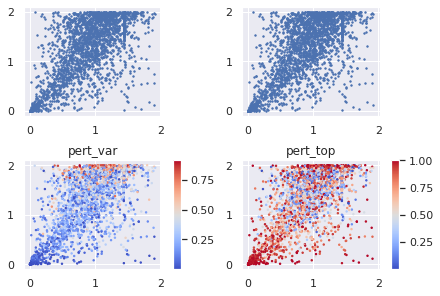

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


fig, axs = plt.subplots(2,2,constrained_layout=True)
# fig, ax = plt.subplots()


# scatter = ax.scatter(x, y,s=1,c=c)
# sns.jointplot(x=x,y=y,hue=domain, kind='scatter',marker="+",marginal_ticks=True)

# target = pert_top
# target = pert_var
target = domain

inp_datas = [None,None,pert_var,pert_top]
inp_names = ['none','none','pert_var','pert_top']
# Create a continuous norm to map from data points to colors
# lc = LineCollection(segments, cmap='viridis', norm=norm)
# Set the values used for colormapping
# lc.set_array(dydx)
# lc.set_linewidth(2)
# line = axs[0].add_collection(lc)

# scatter = plt.scatter(x, y,marker='+')

def example_plot(ax_use, inp_data,title):
    if inp_data == None:
        scatter = ax_use.scatter(x, y,s=2)
    else:
        norm = plt.Normalize(min(inp_data), max(inp_data))
        scatter = ax_use.scatter(x, y, c=inp_data,s=2,norm=norm,cmap='coolwarm')
        fig.colorbar(scatter, ax=ax_use)
        ax_use.set_title(title)

for idx, ax in enumerate(axs.flat) :
    example_plot(ax,inp_data=inp_datas[idx],title=inp_names[idx])



# plt.legend(loc='upper left')
plt.show()


In [12]:
# project to y
import seaborn as sns

sns.set_theme(style="darkgrid")

nbuckets = 20
data_all = [[] for _ in range(nbuckets)]
data_pv = [[] for _ in range(nbuckets)]
data_pt = [[] for _ in range(nbuckets)]
for cor,pt,pv,dom in zip(y,pert_top,pert_var,pert_var):
    cor = min(cor,2)
    buc = int(cor // (2/nbuckets))
    # print(cor,buc)
    data_all[buc].append(1)
    data_pv[buc].append(pv)
    data_pt[buc].append(pt)



<ipython-input-13-b4d53386272f>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_use.set_xticklabels(range(10))


Text(0.5, 0.98, 'Mean')

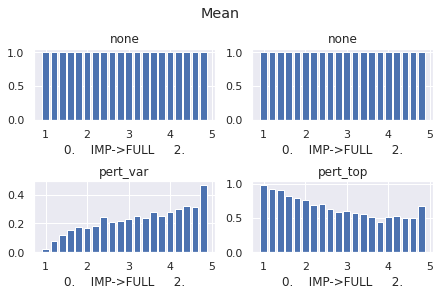

In [13]:
def print_plot(use_data,ax_use,name):
    count =[len(bag) for bag in use_data] 
    mean = [statistics.mean(bag) for bag in use_data]
    ax_use.set_title(name)
    ax_use.set_xticklabels(range(10))
    ax_use.bar(range(nbuckets), mean)

    ax_use.set_xlabel('0.    IMP->FULL     2.')
    # ax_use.lineplot(x=range(nbuckets), y=count,title="Count")
    # plt.title('Scores by group and gender')
targets = [data_all, data_all,data_pv,data_pt ]
inp_names = ['none','none','pert_var','pert_top']
fig, axs = plt.subplots(2,2,constrained_layout=True)

for idx, ax in enumerate(axs.flat) :
    print_plot(targets[idx],ax,inp_names[idx])
fig.suptitle('Mean')

<ipython-input-14-93464e4df2d8>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_use.set_xticklabels(range(10))


Text(0.5, 0.98, 'Count')

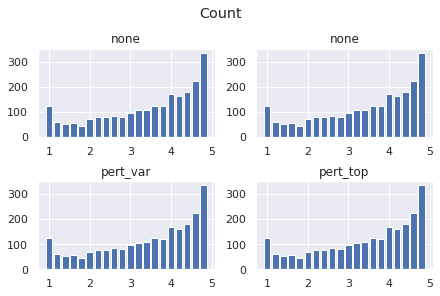

In [14]:
def print_plot(use_data,ax_use,name):
    count =[len(bag) for bag in use_data] 
    mean = [statistics.mean(bag) for bag in use_data]
    ax_use.set_title(name)
    ax_use.set_xticklabels(range(10))
    ax_use.bar(range(nbuckets), count)
    # ax_use.lineplot(x=range(nbuckets), y=count,title="Count")
    # plt.title('Scores by group and gender')
targets = [data_all, data_all,data_pv,data_pt ]
inp_names = ['none','none','pert_var','pert_top']
fig, axs = plt.subplots(2,2,constrained_layout=True)

for idx, ax in enumerate(axs.flat) :
    print_plot(targets[idx],ax,inp_names[idx])
fig.suptitle('Count')

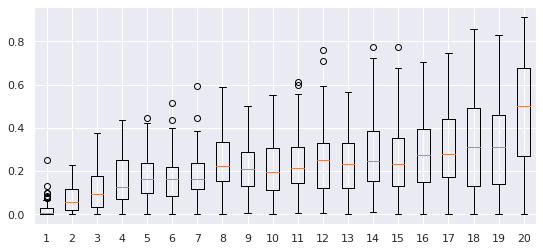

In [16]:
import matplotlib.pyplot as plt
import numpy as np
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))

# plot violin plot
axs.boxplot(data_pv)
fig.show()